In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [5]:
# Step 2: Load the dataset
df = pd.read_csv("C:/Users/YASHASWINI S/Downloads/heart_disease_dataset (1).csv")

# Display first few rows
print(df.head())

# Check basic info
print(df.info())

# Check if any missing values exist
print(df.isnull().sum())

   age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   58    1                1                     134          246   
1   52    0                2                     112          245   
2   59    0                2                     126          196   
3   67    1                1                     165          201   
4   51    1                0                     146          174   

   fasting_blood_sugar  resting_ecg  max_heart_rate  exercise_induced_angina  \
0                    0            0             155                        0   
1                    0            0             143                        1   
2                    0            0             162                        1   
3                    0            0             180                        0   
4                    1            1             133                        1   

   st_depression  st_slope  num_major_vessels  thalassemia  heart_disease  
0            0.4         1  

              age         sex  chest_pain_type  resting_blood_pressure  \
count  400.000000  400.000000       400.000000              400.000000   
mean    53.667500    0.662500         1.712500              123.630000   
std      8.508403    0.473449         1.035628               16.567114   
min     29.000000    0.000000         0.000000               94.000000   
25%     48.000000    0.000000         1.000000              112.000000   
50%     54.000000    1.000000         2.000000              124.000000   
75%     59.000000    1.000000         3.000000              135.000000   
max     77.000000    1.000000         3.000000              174.000000   

       cholesterol  fasting_blood_sugar  resting_ecg  max_heart_rate  \
count   400.000000           400.000000   400.000000      400.000000   
mean    216.627500             0.140000     0.530000      146.717500   
std      41.379941             0.347422     0.533678       21.104293   
min     126.000000             0.000000     0

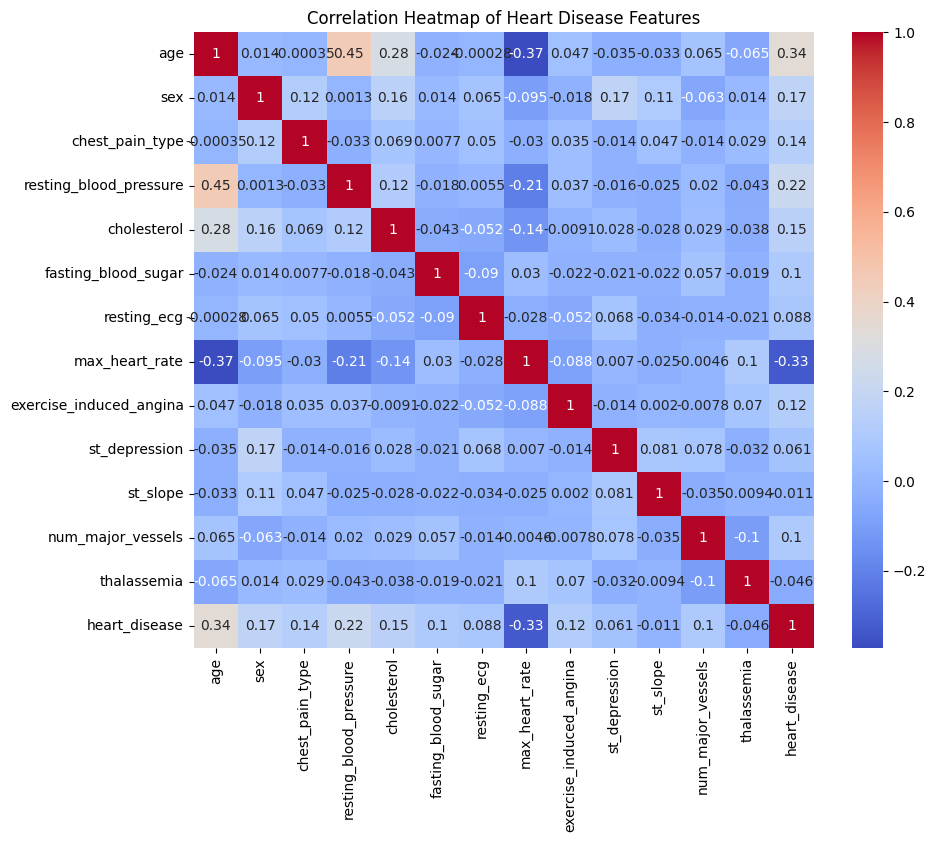

C:\Users\YASHASWINI S\AppData\Local\Temp\ipykernel_25540\2178725146.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='heart_disease', data=df, palette='Set2')


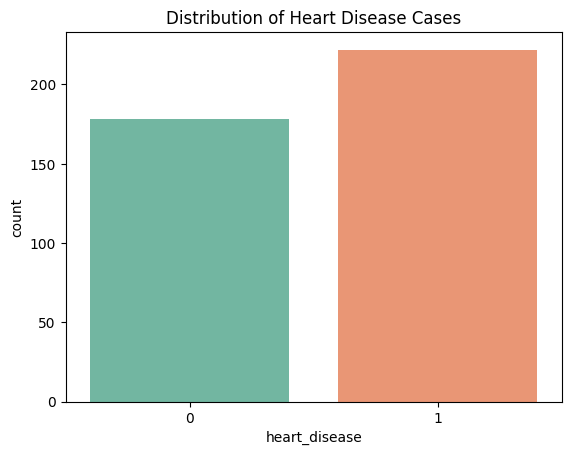

In [6]:
# Step 3: Basic data understanding
print(df.describe())

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Heart Disease Features")
plt.show()

# Target variable distribution
sns.countplot(x='heart_disease', data=df, palette='Set2')
plt.title("Distribution of Heart Disease Cases")
plt.show()

In [7]:
# Step 4: Split the data into features and target
X = df.drop('heart_disease', axis=1)
y = df['heart_disease']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Step 5: Train Models

# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# Train and evaluate models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0        Decision Tree    0.5625   0.612245  0.652174  0.631579  0.546675
1        Random Forest    0.6250   0.660000  0.717391  0.687500  0.618926
2  Logistic Regression    0.7000   0.789474  0.652174  0.714286  0.714194
3                  SVM    0.6750   0.717391  0.717391  0.717391  0.700767


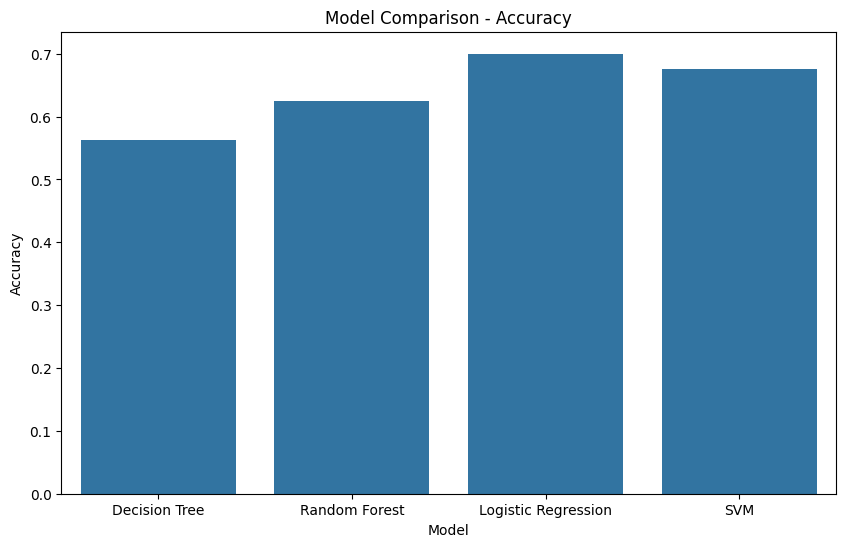

In [9]:
# Step 6: Compare models
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title("Model Comparison - Accuracy")
plt.show()


Best Model: Logistic Regression

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.76      0.68        34
           1       0.79      0.65      0.71        46

    accuracy                           0.70        80
   macro avg       0.70      0.71      0.70        80
weighted avg       0.72      0.70      0.70        80



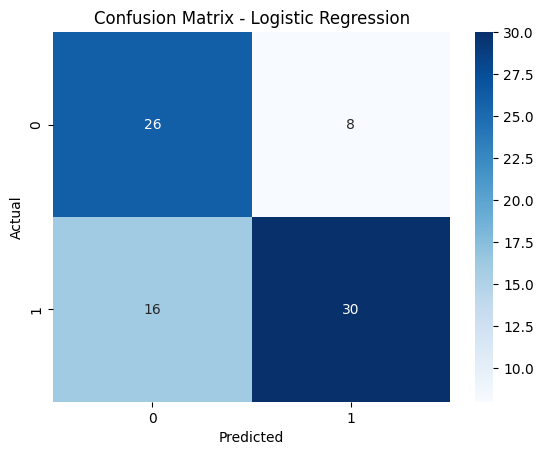

In [10]:
# Step 7: Detailed Evaluation for Best Model
best_model_name = results_df.sort_values(by='ROC-AUC', ascending=False).iloc[0]['Model']
best_model = models[best_model_name]

y_pred_best = best_model.predict(X_test)

print(f"\nBest Model: {best_model_name}\n")
print("Classification Report:\n", classification_report(y_test, y_pred_best))

cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [11]:
import joblib

# Save the best model
joblib.dump(best_model, 'best_heart_disease_model.pkl')

# Save the scaler too
joblib.dump(scaler, 'scaler.pkl')

print("Best model and scaler saved successfully!")


Best model and scaler saved successfully!
